                                                  HEART DISEASE DETECTION USING MACHINE LEARNING

##HEART DISEASE DETECTION

Heart disease remains a significant global health issue, leading to millions of deaths each year. The objective of this project is to utilize machine learning algorithms to predict the likelihood of heart disease in a patient using health-related metrics.

##Introduction

Heart disease, also known as cardiovascular disease, is a category of diseases that involve the heart or blood vessels. Machine learning offers a powerful approach to identify patterns in medical data, enabling the development of models capable of predicting the presence of heart disease. This report explores the process of creating a prediction system using structured data consisting of multiple features such as age, cholesterol level, chest pain type, and more. By comparing multiple classification models, we aim to select the most reliable and accurate model for deployment

##Problem Statement

Early diagnosis of heart disease can drastically reduce the risk of severe complications. Traditional methods rely on human interpretation, which is prone to errors and delays. With the growing availability of structured healthcare datasets, machine learning can provide a decision support system for doctors and health professionals. This project is motivated by the need for fast, reliable, and scalable tools that can assist in the early detection of heart conditions based on patient data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.anaconda', '.android', '.conda', '.condarc', '.continuum', '.eclipse', '.git-for-windows-updater', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', '.node_repl_history', '.p2', '.platformio', '.streamlit', '.VirtualBox', '.vscode', 'app.py', 'AppData', 'Application Data', 'app_with_visuals.py', 'Contacts', 'Cookies', 'CrossDevice', 'demo', 'Desktop', 'disease_detection.ipynb', 'Documents', 'Downloads', 'eclipse', 'Favorites', 'heart.csv', 'heart_disease.ipynb', 'heart_disease_detection.ipynb', 'images_CorrHeatmap.png', 'Links', 'Local Settings', 'model.pkl', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{719678a6-f0eb-11ef-ae04-d3cdadd794e4}.TM.blf', 'NTUSER.DAT{719678a6-f0eb-11ef-ae04-d3cdadd794e4}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{719678a6-f0eb-11ef-ae04-d3cdadd794e4}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'parkinsons_disease_data.csv', 'pa

In [2]:
#II. Importing and understanding our dataset
dataset = pd.read_csv("heart.csv")

In [3]:
#Verifying it as a 'dataframe' object in pandas
type(dataset)

pandas.core.frame.DataFrame

In [4]:
#Shape of dataset
dataset.shape

(303, 14)

In [5]:
#Printing out a few columns
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


##Dataset Description The dataset used in this project is sourced from the UCI Machine Learning Repository and also available on Kaggle. It consists of 303 records and 14 attributes, including both categorical and numerical values. The target variable is binary (0 = no disease, 1 = disease present). Important features include age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol level (chol), and maximum heart rate achieved (thalach)



In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [12]:
# Clearly, this is a classification problem, with the target variable having values '0' and '1'
#Checking correlation between columns
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


                                                EXPLORATORY DATA ANALYSIS

##Exploratory Data Analysis (EDA)

EDA is crucial for understanding feature relationships and identifying patterns or anomalies. Findings revealed that features like chest pain type, thalach, and oldpeak are strongly correlated with the target



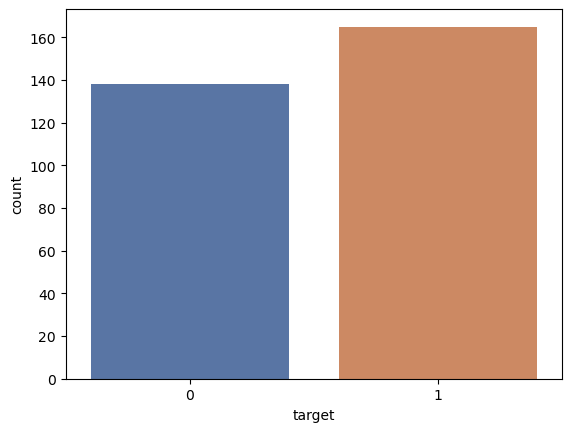

target
1    165
0    138
Name: count, dtype: int64


In [13]:
#Exploratory Data Analysis (EDA)
#First, analysing the target variable:
y = dataset["target"]

sns.countplot(x="target",data=dataset,palette=["#4c72b0","#dd8452"])
plt.show()


target_temp = dataset.target.value_counts()

print(target_temp)


In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [15]:
#analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
#Analysing the 'Sex' feature
dataset["sex"].unique()

array([1, 0], dtype=int64)

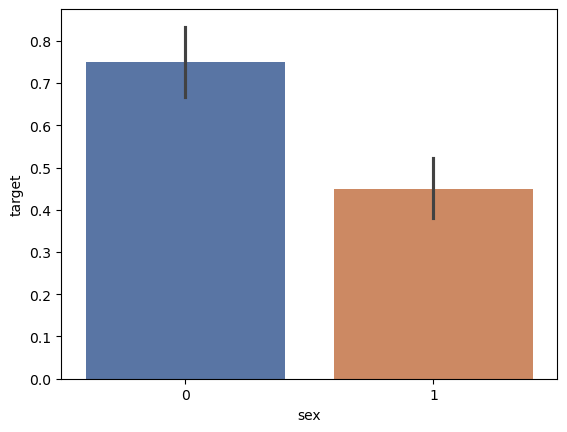

In [16]:
sns.barplot(x="sex",y="target",data=dataset,palette=["#4c72b0","#dd8452"])
plt.show()

#We notice, that females are more likely to have heart problems than males
#Analysing the 'Chest Pain Type' feature

In [17]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

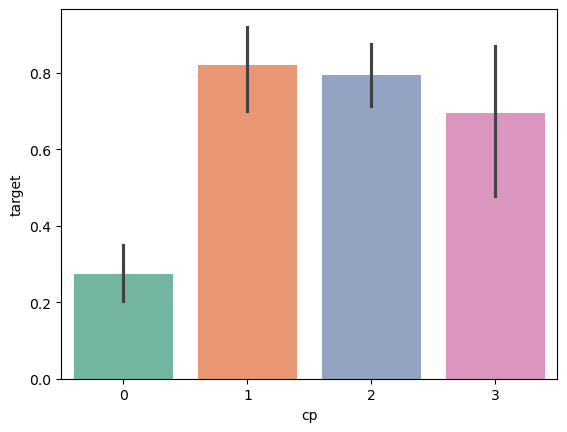

In [18]:
sns.barplot(x="cp",y="target",data=dataset,palette="Set2")
plt.show()

In [19]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [20]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

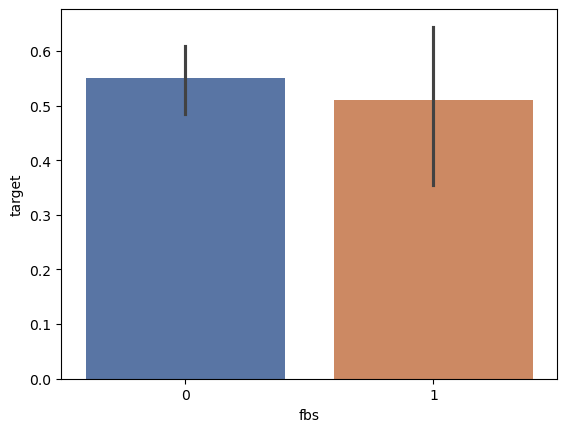

In [21]:
#We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems
#Analysing the FBS feature
sns.barplot(x="fbs",y="target",data=dataset,palette=["#4c72b0","#dd8452"])
plt.show()

In [22]:
#Analysing the restecg feature
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

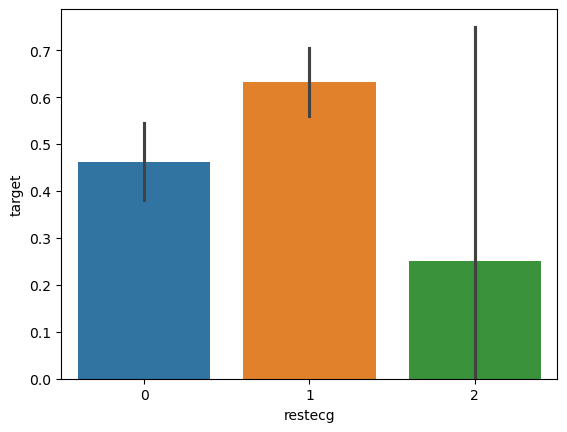

In [23]:
sns.barplot(x="restecg",y="target",data=dataset,palette=["#1f77b4","#ff7f0e","#2ca02c"])
plt.show()

In [24]:
#We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'
#Analysing the 'exang' feature
dataset["exang"].unique()

array([0, 1], dtype=int64)

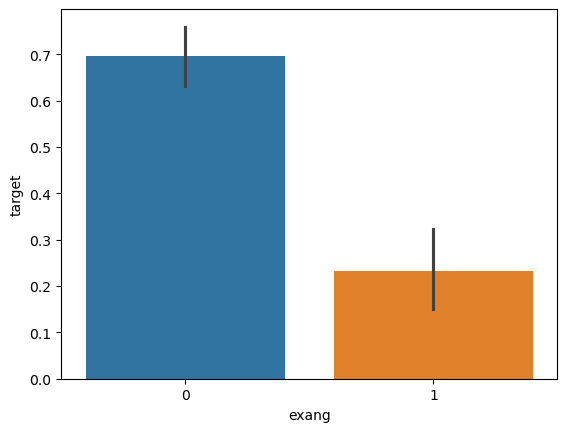

In [25]:
sns.barplot(x="exang",y="target",data=dataset,palette=["#1f77b4","#ff7f0e"])
plt.show()

In [26]:
#People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems
#Analysing the Slope feature
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

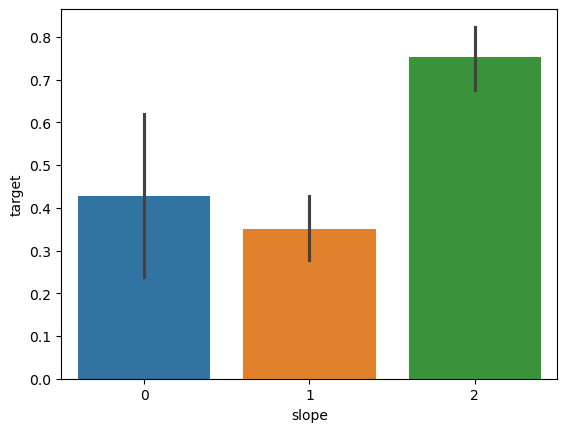

In [27]:
sns.barplot(x="slope",y="target",data=dataset,palette=["#1f77b4","#ff7f0e","#2ca02c"])
plt.show()

In [28]:
#We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'
#Analysing the 'ca' feature
#number of major vessels (0-3) colored by flourosopy
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

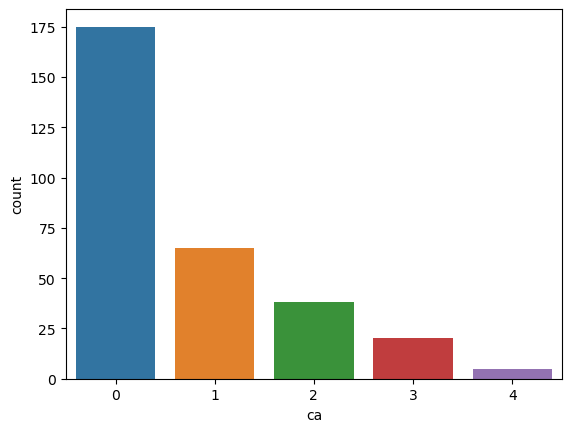

In [29]:
sns.countplot(x=dataset["ca"],palette=["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"])
plt.show()

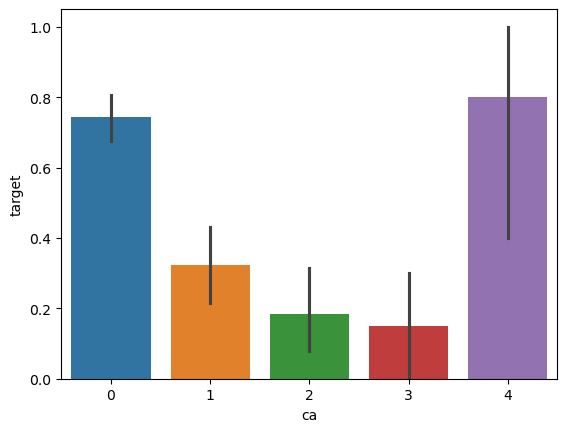

In [30]:
sns.barplot(x="ca",y="target",data=dataset,palette=["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"])
plt.show()

In [31]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

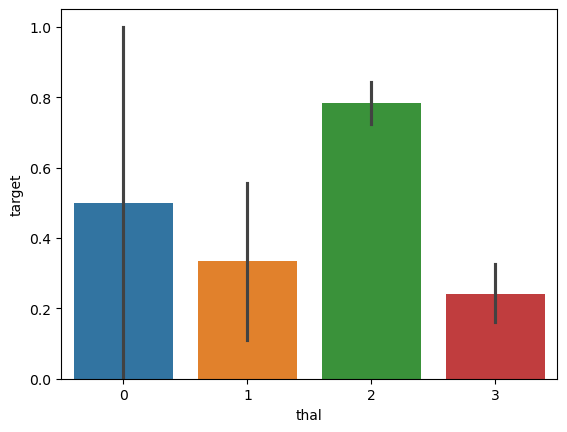

In [32]:
sns.barplot(x="thal",y="target",data=dataset,palette=["#1f77b4","#ff7f0e","#2ca02c","#d62728"])
plt.show()

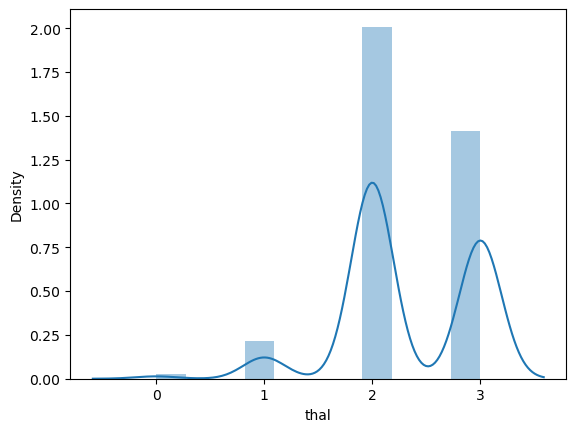

In [33]:
sns.distplot(dataset["thal"])
plt.show()

                                                   SPLITTING OF TRAIN,TEST DATA

In [34]:
 #Train Test split
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [35]:
X_train.shape

(242, 13)

In [36]:
Y_train.shape

(242,)

In [37]:
Y_test.shape

(61,)

In [38]:
#V. Model Fitting
from sklearn.metrics import accuracy_score

##Heart Disease Prediction Using Machine Learning

1.Logistic Regression: Linear classifier, interpretable and fast.
2.Naive Bayes (Gaussian): Based on Bayes theorem assuming independence.
3.K-Nearest Neighbors: Distance-based classification.
4.Support Vector Machine: Maximizes margin between classes.
5.Decision Tree: Rule-based classification; tuned over 200 iterations.
6.Random Forest: Ensemble of decision trees; tuned over 2000 iterations

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

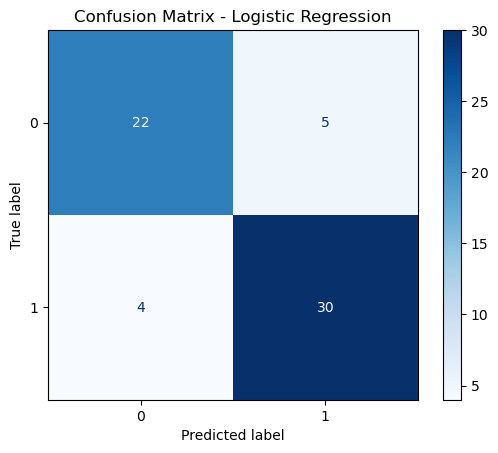

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [41]:
Y_pred_lr.shape

(61,)

In [42]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [43]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

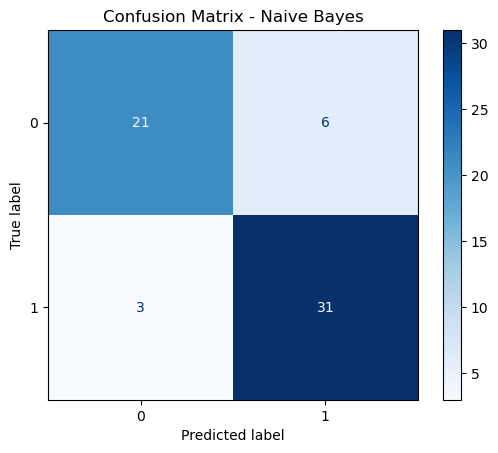

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [45]:
Y_pred_nb.shape

(61,)

In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [47]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

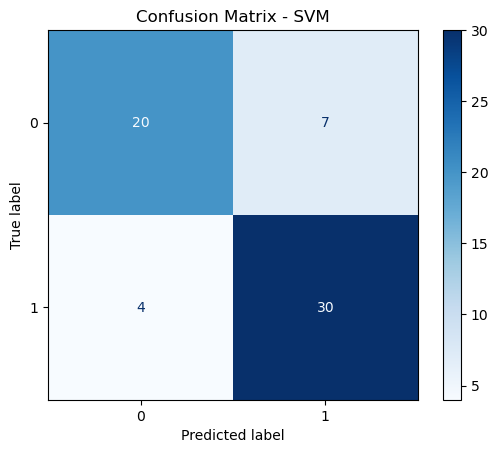

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

In [49]:
Y_pred_svm.shape

(61,)

In [50]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [51]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

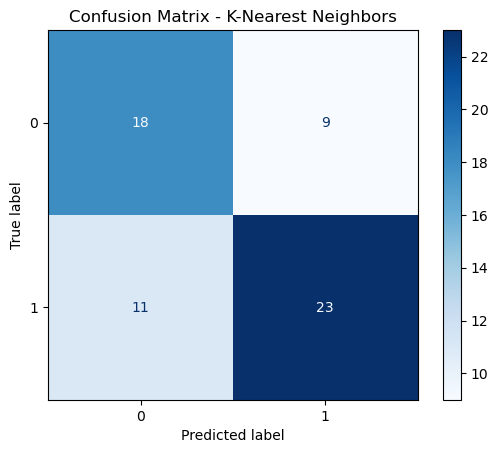

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

In [53]:
Y_pred_knn.shape

(61,)

In [54]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [55]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

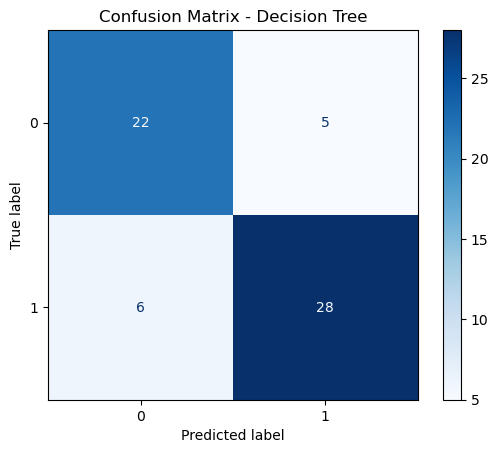

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [57]:
print(Y_pred_dt.shape)

(61,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [59]:
#Random Forest
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x=0


for x in tqdm(range(2000)):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [06:17<00:00,  5.30it/s]


90.16
323


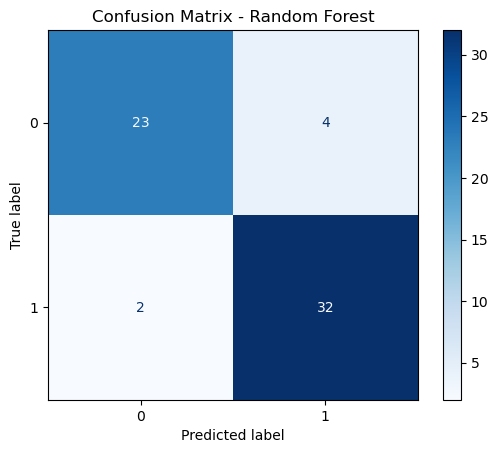

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [61]:
Y_pred_rf.shape

(61,)

In [62]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [63]:
#VI. Output final score
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


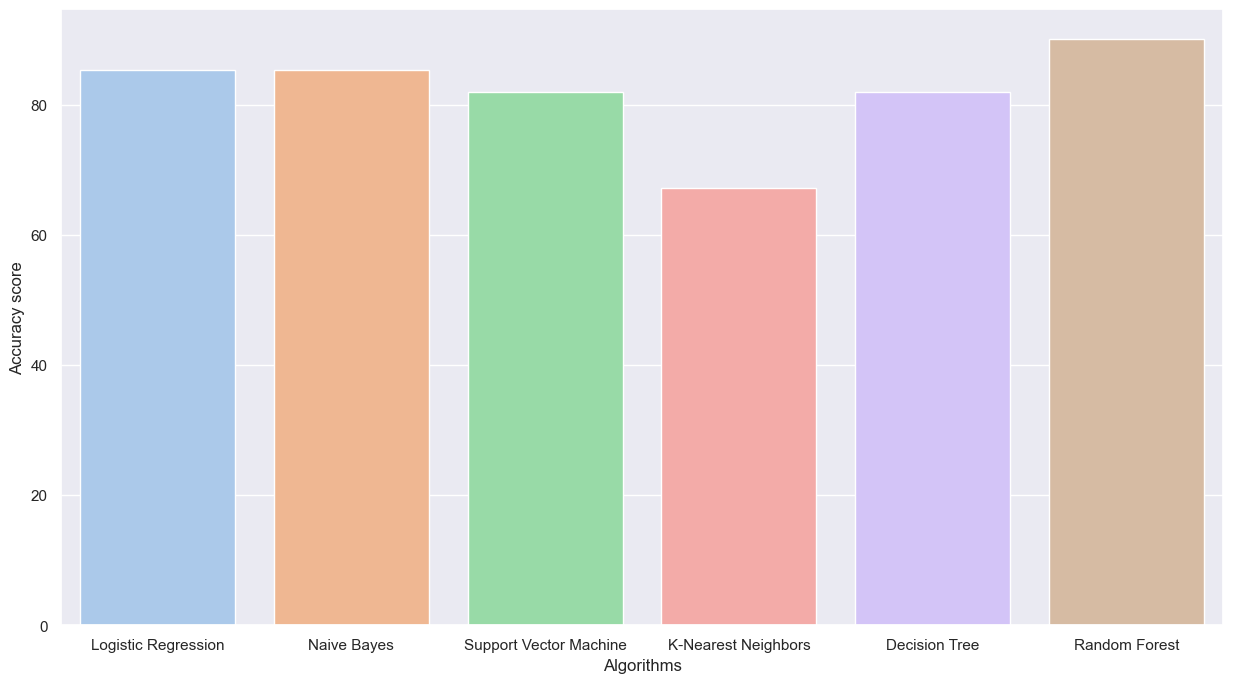

In [64]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores,palette="pastel")
plt.show()

#Saving Model

In [1]:
import pickle

# Save the trained Random Forest model
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

NameError: name 'rf' is not defined